# <font size='10' color='#1ABC9C'> Transforming the Data </font>

Handling the Skewness in continuous Features.

Handling Categorical Features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
## When using the 'inline' backend, 
## your matplotlib graphs will be included in your notebook, next to the code.
import seaborn as sns

pd.pandas.set_option('display.max_columns',None)

In [2]:
dataset=pd.read_csv('IncomeData.csv')

##What's the shape of data set
print(dataset.shape)

(4508, 13)


## Basic Summary of the Varables in the Data Set
edcat - Categorical Data

default - Categorical Data and binary

jobsat - Categorical Data and ordinal

homeown - Categorical Data and binary

cars - Descrete and numerical Data

yrsed - Descrete and numerical Data

yrsempl - Descrete and numerical Data

address - Descrete and numerical Data

age - Descrete and numerical Data

Income - Descrete and Dependent Variable

creddebt- Continuous and Numeric Data

othdebt - Continuous and Numeric Data

carvalue- Continuous and Numeric Data


### One-Hot encoding for categorical feature 
We'll do this only for edcat , as other categorical features are already either binary or ordinally encoded

##### checking missing values

In [3]:
#What percentage of Missing Values are there in the each feature

## Create a List of all features with missing values
features_miss_val=[features for features in dataset.columns if dataset[features].isnull().sum()>1] 
print(features_miss_val)

[]


##### >>>>>>No missing Values in Data

In [4]:
temp = pd.get_dummies(dataset['edcat'],drop_first=True)
dataset = pd.concat([dataset , temp],axis=1)
##droping the edcat
dataset= dataset.drop(['edcat'],axis=1)


In [5]:
dataset.rename(columns = {'2':'edcat2'}, inplace = True)
dataset.rename(columns = {'3':'edcat3'}, inplace = True)
dataset.rename(columns = {'4':'edcat4'}, inplace = True)
dataset.rename(columns = {'5':'edcat5'}, inplace = True)
dataset.head()

,age,yrsed,yrsempl,income,creddebt,othdebt,default,jobsat,homeown,address,cars,carvalue,2,3,4,5
0,45,6,4,17,0.371518,1.294482,0,4,1,22,1,9.1,0,0,0,0
1,67,6,15,12,0.375552,0.392448,0,3,1,28,1,5.9,0,0,0,0
2,68,6,7,9,0.200970,0.789030,0,5,0,21,1,5.8,0,0,0,0
3,75,6,35,16,0.314096,0.757904,0,4,0,11,1,5.8,0,0,0,0
4,38,7,8,37,0.143190,0.411810,0,3,0,11,1,22.1,0,0,0,0


In [6]:
dataset.shape

(4508, 16)

# log Transformation  of all values other than categorical data


In [7]:
list_features = (['income','yrsed','age','yrsempl','creddebt','othdebt','cars','carvalue'])
print(list_features)

['income', 'yrsed', 'age', 'yrsempl', 'creddebt', 'othdebt', 'cars', 'carvalue']


In [8]:
dataset.head()

,age,yrsed,yrsempl,income,creddebt,othdebt,default,jobsat,homeown,address,cars,carvalue,2,3,4,5
0,45,6,4,17,0.371518,1.294482,0,4,1,22,1,9.1,0,0,0,0
1,67,6,15,12,0.375552,0.392448,0,3,1,28,1,5.9,0,0,0,0
2,68,6,7,9,0.200970,0.789030,0,5,0,21,1,5.8,0,0,0,0
3,75,6,35,16,0.314096,0.757904,0,4,0,11,1,5.8,0,0,0,0
4,38,7,8,37,0.143190,0.411810,0,3,0,11,1,22.1,0,0,0,0


In [9]:
for feature in list_features:
    dataset[feature] = np.log10(dataset[feature])
   

C:\Users\offic\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [10]:

# Replacing infinite with nan
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
  
# Dropping all the rows with nan values
dataset.dropna(inplace=True)
  
# Printing df
dataset.shape

(3922, 16)

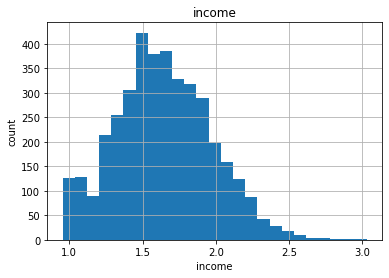

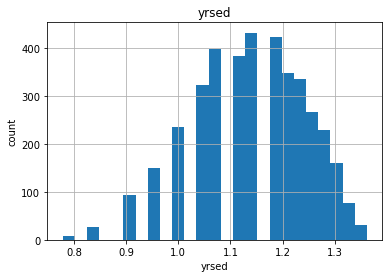

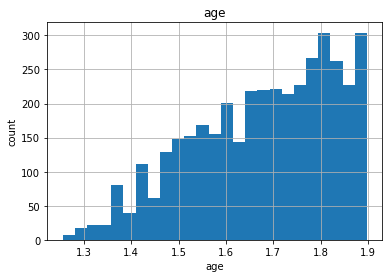

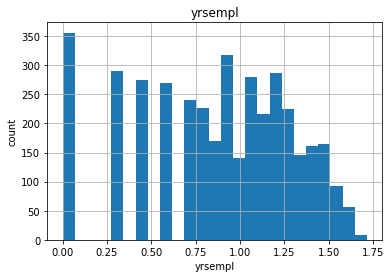

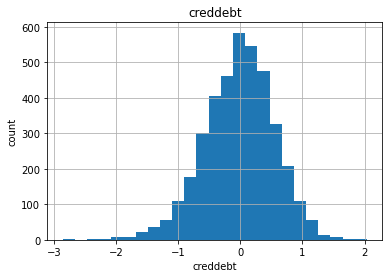

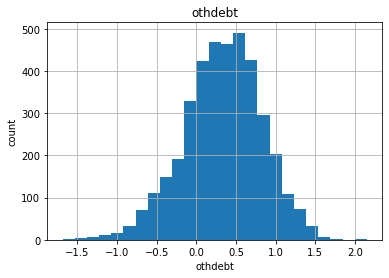

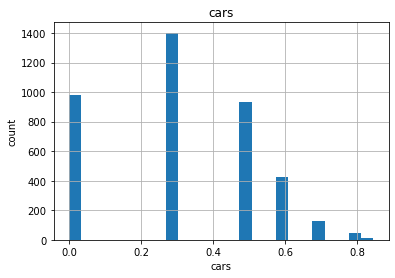

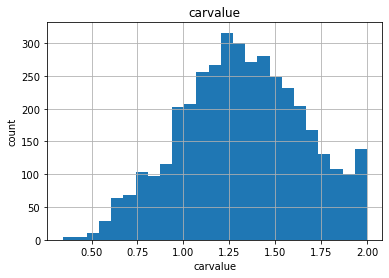

In [11]:
for feature in list_features:
    dataset[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

# <font size='10' color='#1ABC9C'> Scaling the Data </font>
We need to do feature scaling because we have different feature measured with different units hence its good to do scaling before proceeding to apply machine learnign Algorithm.

age cannot have 0 , there for we need to provide range to the scaler

Helps in applying M.L. Algo in a better way

Remember scaling is not applied on the Dependent Variable (income)

#### In making ML Model , we are not scaling the features.

## Moving to Assumption Testing


In [12]:
dataset.to_csv('dataset_cleaned.csv',index=False)